In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import helper_elements.helper_elements as hp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Загружаем все предоставленные данные

In [3]:
date_columns = ['expiration_date', 'registration_init_time']

train_data = pd.read_csv('datas/train.csv')
test_data = pd.read_csv('datas/test.csv', index_col = 0)
member = pd.read_csv('datas/members.csv', parse_dates=date_columns)
songs = pd.read_csv('datas/songs.csv')
extra_song = pd.read_csv('datas/song_extra_info.csv')


Мёржим всё в 1 датасет для удобства анализа

In [4]:
train_test_data = pd.concat([train_data, test_data])

train_test_data = train_test_data.merge(songs, on='song_id', how='left')
train_test_data = train_test_data.merge(member, on='msno', how='left')

In [7]:
train_test_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,NaN,7,2012-01-02,2017-10-05
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,284584.0,1259,Various Artists,NaN,NaN,52.0,13,24,female,9,2011-05-25,2017-09-11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,female,9,2011-05-25,2017-09-11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,13,24,female,9,2011-05-25,2017-09-11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,2012-01-02,2017-10-05


In [8]:
hp.count_na(train_test_data)

,NA_count,Percentage
msno,0,0.000000
song_id,0,0.000000
source_system_tab,33291,0.335115
source_screen_name,577687,5.815129
source_type,28836,0.290270
target,2556790,25.737230
song_length,139,0.001399
genre_ids,160565,1.616284
artist_name,139,0.001399
composer,2295010,23.102093


Мы видим, что есть пустые значения во всех файлах. Необходимо просмотреть распределения и определить, какие переменные вносят максимальный вклад в среднем (из-за этого и используем mean)

In [5]:
mean_source = pd.DataFrame(train_test_data.groupby('source_system_tab').size())
mean_source.reset_index(level=0, inplace=True)
mean_source.columns = ['Source System Tab', 'Count']
mean_source = mean_source.sort_values(by='Count', ascending=False)
print(mean_source)

  Source System Tab    Count
3        my library  4704222
0          discover  3050320
6            search   900901
5             radio   689466
2       listen with   310894
1           explore   233972
4      notification     8309
7          settings     2833


Мы видим, что наибольшее кол-во элементов = my library, после идёт discover и т.д.

Проведём аналогичный анализ для source_screen_name.

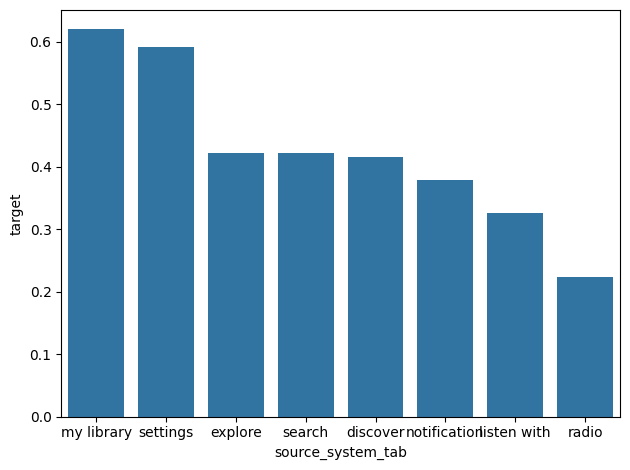

In [21]:
grouped_data = train_test_data.groupby('source_system_tab')['target'].mean().reset_index().sort_values(by='target', ascending=False)
g = sns.barplot(
    x='source_system_tab', 
    y='target', 
    data=grouped_data, 
)
plt.tight_layout()
plt.show()


По barplot мы видим зависимость значений фичи от target. Наибольшее у my library и settings

In [6]:
mean_source = pd.DataFrame(train_test_data.groupby('source_screen_name').size())
mean_source.reset_index(level=0, inplace=True)
mean_source.columns = ['Source Screen Name', 'Count']
mean_source = mean_source.sort_values(by='Count', ascending=False)
print(mean_source)


      Source Screen Name    Count
8    Local playlist more  4073317
11  Online playlist more  1824496
16                 Radio   685668
0             Album more   596285
17                Search   420469
1            Artist more   363428
4       Discover Feature   337647
3         Discover Chart   292657
12   Others profile more   292252
5         Discover Genre   123819
9             My library   101539
7                Explore   100214
21               Unknown    77790
6           Discover New    21232
19         Search Trends    18515
18           Search Home    18187
10     My library_Search     8565
20     Self profile more      343
2                Concert       60
13               Payment       24
15          People local       13
14         People global        1


Подавляющее большинство значений приходит на Local playlist more - библиотека пользователя, после на Online playlist more - онлайн библиотека.

Просмотрим на source_type

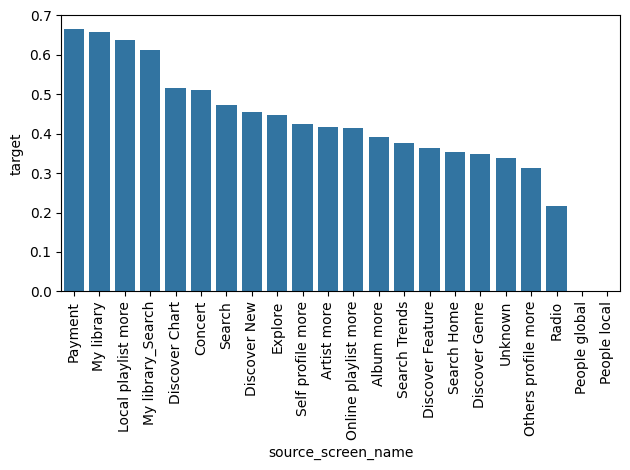

In [24]:
grouped_data = train_test_data.groupby('source_screen_name')['target'].mean().reset_index().sort_values(by='target', ascending=False)
g = sns.barplot(
    x='source_screen_name', 
    y='target', 
    data=grouped_data, 
)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

По зависимостям значения фичей от таргета видно, что наибольшее у payment, после my library и т.д.

In [9]:
mean_source = pd.DataFrame(train_test_data.groupby('source_type').size())
mean_source.reset_index(level=0, inplace=True)
mean_source.columns = ['Source Type', 'Count']
mean_source = mean_source.sort_values(by='Count', ascending=False)
print(mean_source)

               Source Type    Count
3            local-library  2843745
6          online-playlist  2742456
4           local-playlist  1374040
7                    radio   698273
0                    album   672534
10     top-hits-for-artist   602974
8                     song   373875
9      song-based-playlist   297706
2              listen-with   277341
11  topic-article-playlist    16276
1                   artist     3466
5        my-daily-playlist     2686


В среднем наибольшее среднее в local library, после online-playlist и т.д

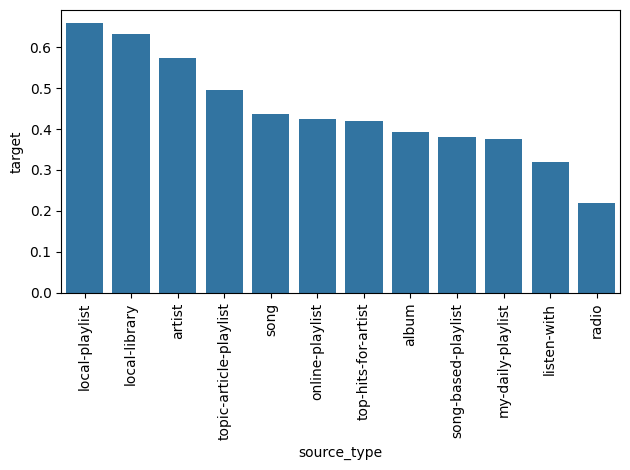

In [25]:
grouped_data = train_test_data.groupby('source_type')['target'].mean().reset_index().sort_values(by='target', ascending=False)
g = sns.barplot(
    x='source_type', 
    y='target', 
    data=grouped_data, 
)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

По зависимостям значения фичей от таргета видно, что наибольшее у local-playlist, после local-library и т.д.

По таргету присутствует пропущенных значений = 2556790. Данное значение обуславливается тем, что я совместил train и test датасеты в 1, а как известно,
в тесте нет таргета.


## Теперь проверим параметры начиная от song_length и до language. Они содержались (до мёржа) в файле songs

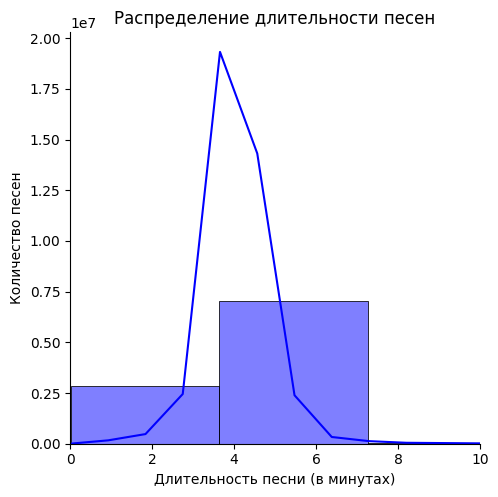

In [37]:
song_length_min = train_test_data['song_length'] / 60000  # Конвертация миллисекунд в минуты

# Построение гистограммы с длительностями в минутах
sns.displot(song_length_min, kde=True, color='blue', bins=50)
plt.xlim(0, 10) 
# меньше 0 длины песни не может быть, а 10 - обнаружено опытным путем (выше 10 минут песня - это слишком много, даже в песне у Джарахова
# Гена Букинг песня идёт 8 минут, хотя там 7 исполнителей)
plt.title('Распределение длительности песен')
plt.xlabel('Длительность песни (в минутах)')
plt.ylabel('Количество песен')

plt.show()

Мы видим, что средняя длительность песни около 3х минут

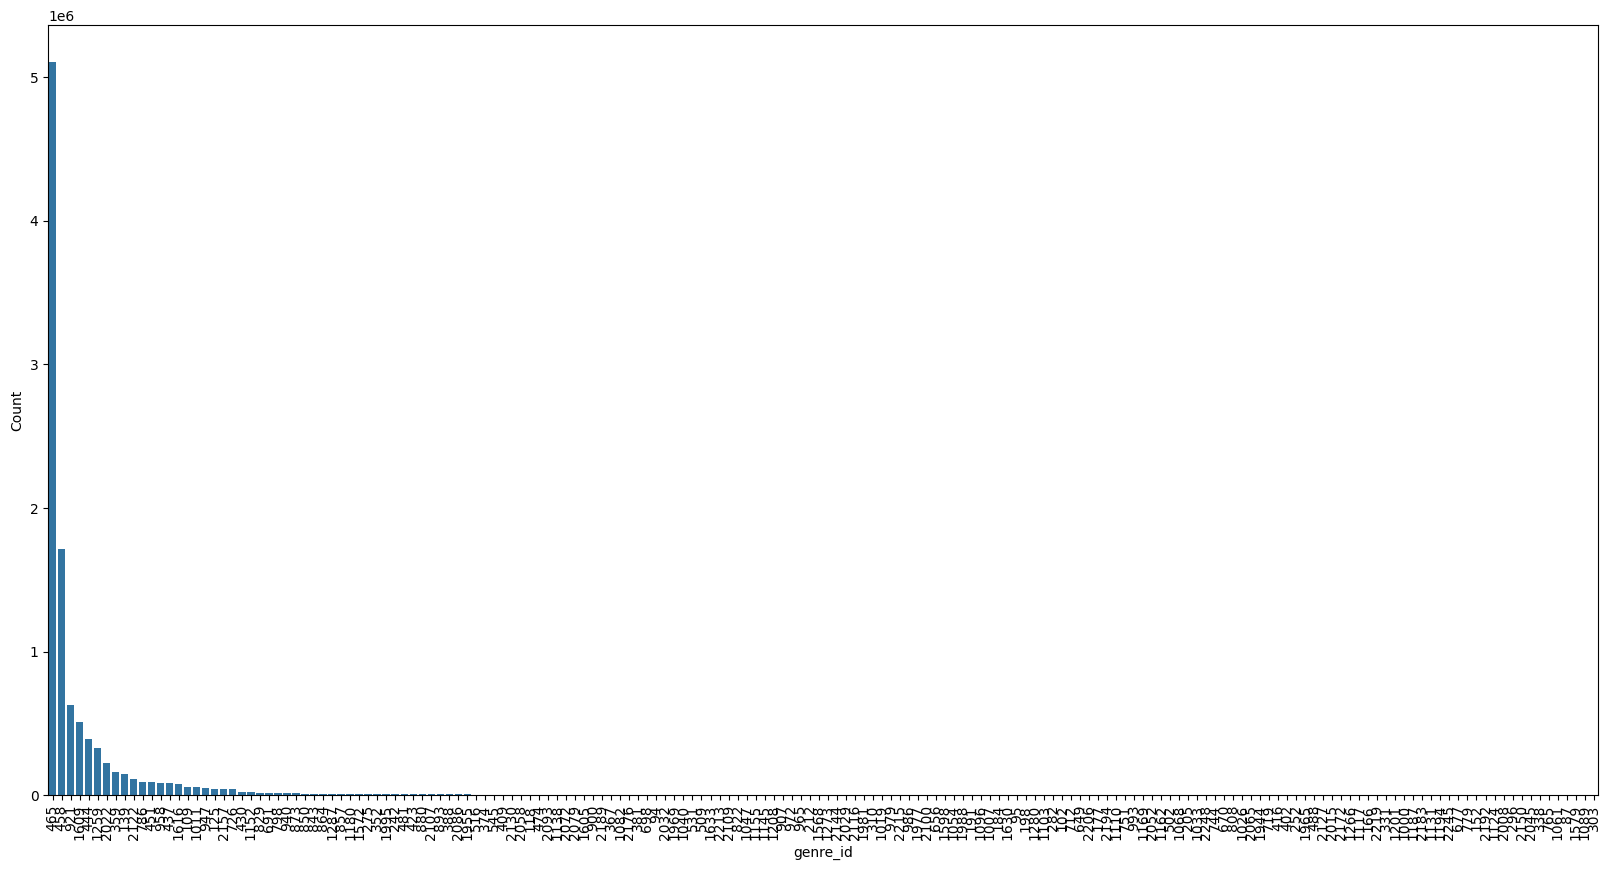

In [9]:
# Найдем распределение genre_id

genre_counts = hp.genres(train_test_data.genre_ids)
genre_df = pd.DataFrame(list(genre_counts.items()), columns=['genre_id', 'Count']).sort_values('Count', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=genre_df, x='genre_id', y='Count')

plt.xticks(rotation=90)
plt.show()

Жанр под номером 465 имеет наибольшее кол-во, после идёт 458 и т.д. Всего 171 уникальных жанров

Столбец lyricist является не Nan только тогда, когда песня является лиричной, воспроизведем значения фичи

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
D:\FOR STADY\python\VK_RS_relevant_tracks\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38463 (\N{CJK UNIFIED IDEOGRAPH-963F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\FOR STADY\python\VK_RS_relevant_tracks\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
D:\FOR STADY\python\VK_RS_relevant_tracks\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\FOR STA

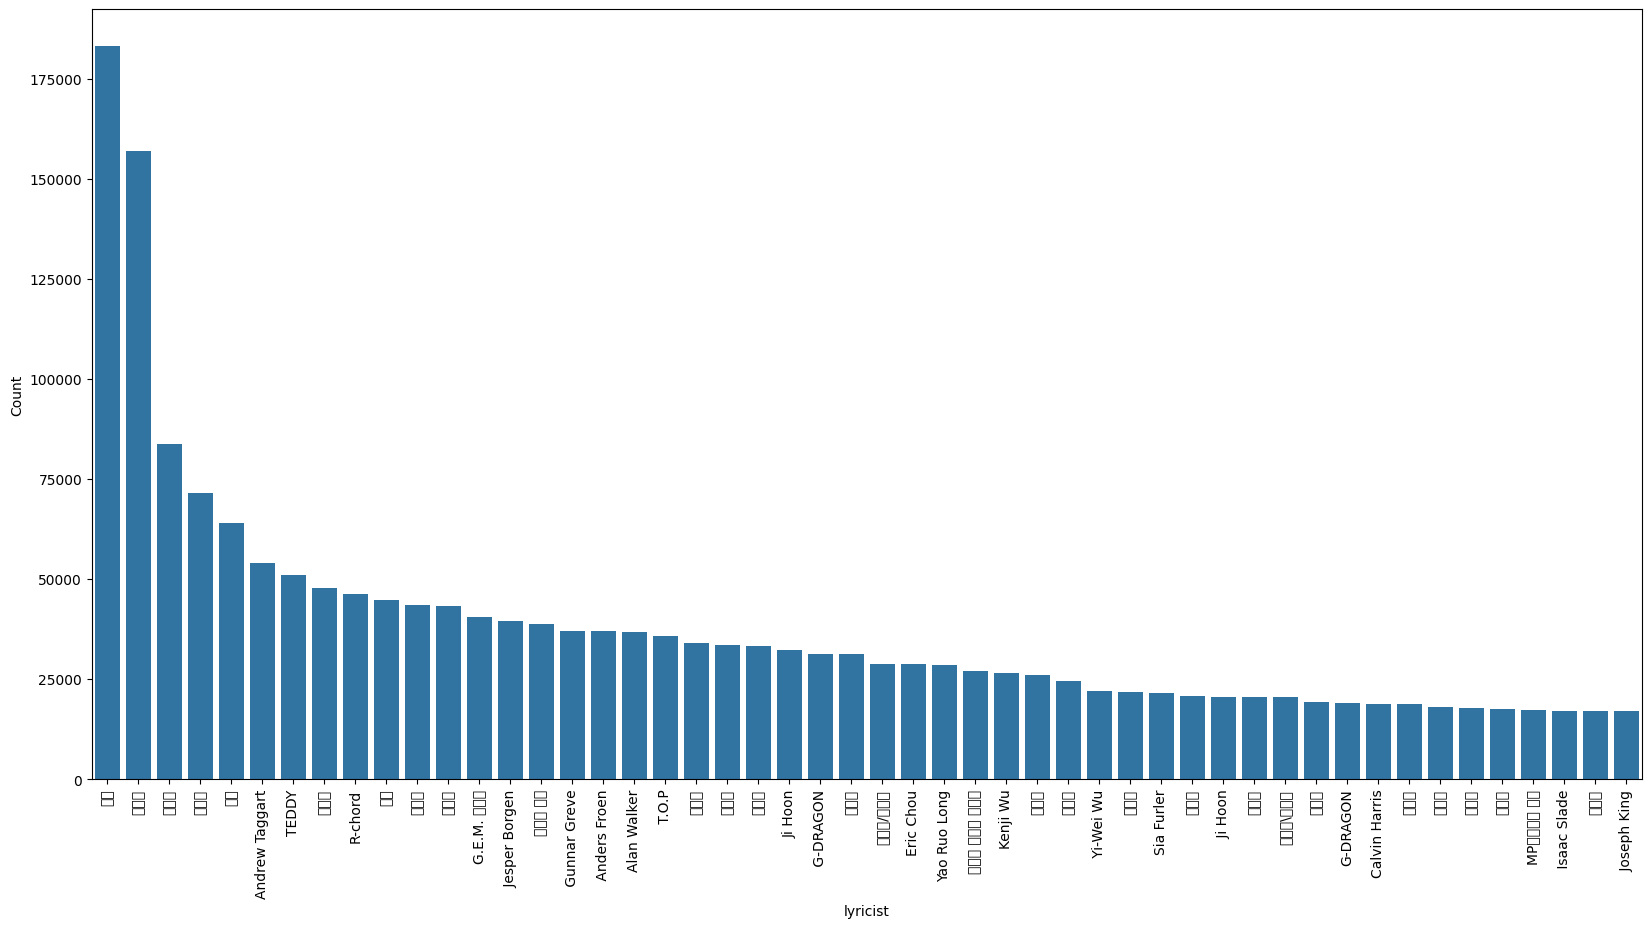

In [4]:
lyricist_counts = hp.genres(train_test_data.lyricist)
lyricist_df = pd.DataFrame(list(lyricist_counts.items()), columns=['lyricist', 'Count']).sort_values('Count', ascending=False)
lyricist_df=lyricist_df[0:50]
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=lyricist_df, x='lyricist', y='Count')

plt.xticks(rotation=90)
plt.show()

Как мы видим, в значениях есть очень много иероглифов, из-за чего они не отображаются (нужен шрифт SimHei), мы видим, что они преобладают в кол-ве.

В фиче composer также присутствует очень большое кол-во иероглифов (проверено, выводил и просматривал). Также, по логике, если у песни нет исполнителя, то фактически данное значение не заполнить вручную, т.к. мы его не будем знать, не помогут ни среднее, не мода и не медиана.

Тоже самое и с artist_name.

Посмотрим распределение фичи Language

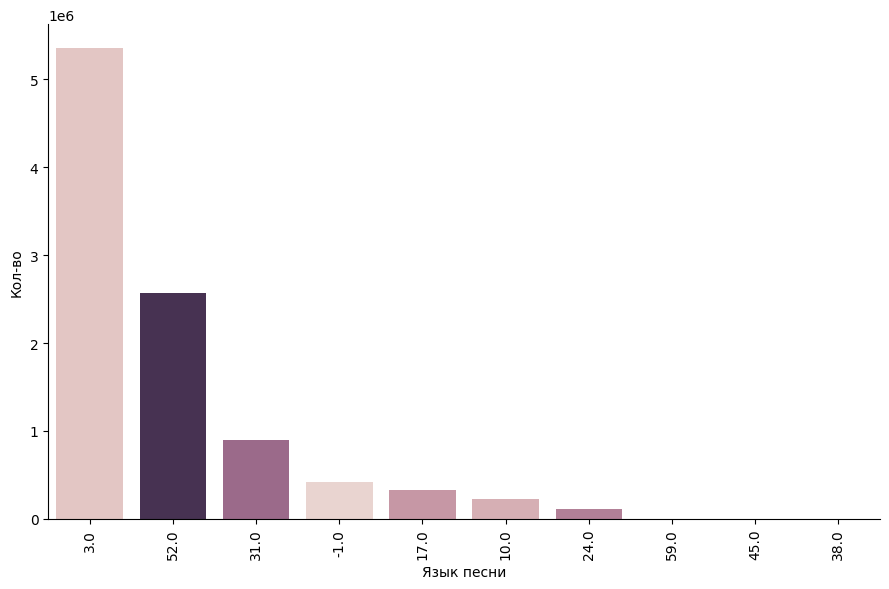

In [17]:
language_counts = pd.DataFrame(train_test_data.groupby('language').size()).reset_index()
language_counts.columns = ['Language', 'Count']
language_counts = language_counts.sort_values(by='Count', ascending=False)
sns.catplot(
    x='Language', 
    y='Count', 
    kind='bar', 
    order=language_counts['Language'],
    data=language_counts, 
    height=6, 
    aspect=1.5, 
    hue='Language', 
    legend=False
)
plt.xlabel('Язык песни')
plt.ylabel('Кол-во')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Наибольшее кол-во языка - 3.0. Они все закодированы числом. Попытался найти в базе такую кодировку языков - не смог. Скорее всего, это что-то внутреннее

## Файл member (от city до expiration_data)

Проверим значения gender, т.к. именно в нем присутствуют пустые значения

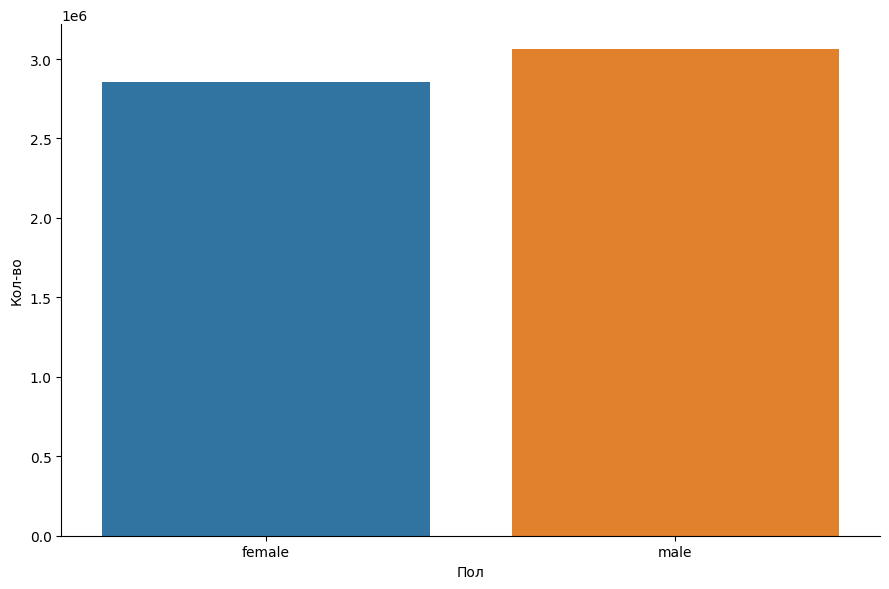

In [33]:
gender_counts = pd.DataFrame(train_test_data.groupby('gender').size()).reset_index()
gender_counts.columns = ['Gender', 'Count']
sns.catplot(
    x='Gender', 
    y='Count', 
    kind='bar', 
    data=gender_counts, 
    height=6, 
    aspect=1.5, 
    hue='Gender', 
    legend=False
)
plt.xlabel('Пол')
plt.ylabel('Кол-во')
plt.tight_layout()
plt.show()

Из графика видно, что соотношение почти 1 к 1 (в данных есть ещё много NaN значений, их на самом деле больше по кол-чу чем female / male)

В целом, на этой основе можно переходить в Feature Engineering